# Imports

In [ ]:
import pickle

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.base import clone

pd.set_option("display.max_columns", 50)

%matplotlib inline

# Dataset

In [ ]:
dataset = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00603/in-vehicle-coupon-recommendation.csv')

# Revisión del dataset

In [ ]:
#Tamaño del dataset (registros, variables). En la nomenclatura de pandas es (axis 0, axis 1)
dataset.shape

(12684, 26)

In [ ]:
#Vemos los primeros registros del dataset
dataset.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0


In [ ]:
dataset.count()

destination             12684
passanger               12684
weather                 12684
temperature             12684
time                    12684
coupon                  12684
expiration              12684
gender                  12684
age                     12684
maritalStatus           12684
has_children            12684
education               12684
occupation              12684
income                  12684
car                       108
Bar                     12577
CoffeeHouse             12467
CarryAway               12533
RestaurantLessThan20    12554
Restaurant20To50        12495
toCoupon_GEQ5min        12684
toCoupon_GEQ15min       12684
toCoupon_GEQ25min       12684
direction_same          12684
direction_opp           12684
Y                       12684
dtype: int64

In [ ]:
dataset.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [ ]:
dataset.nunique()

destination               3
passanger                 4
weather                   3
temperature               3
time                      5
coupon                    5
expiration                2
gender                    2
age                       8
maritalStatus             5
has_children              2
education                 6
occupation               25
income                    9
car                       5
Bar                       5
CoffeeHouse               5
CarryAway                 5
RestaurantLessThan20      5
Restaurant20To50          5
toCoupon_GEQ5min          1
toCoupon_GEQ15min         2
toCoupon_GEQ25min         2
direction_same            2
direction_opp             2
Y                         2
subscripcion_deposito     2
dtype: int64

In [ ]:
dataset.loc[dataset['car'].notna()].tail(20)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,subscripcion_deposito
8278,No Urgent Place,Friend(s),Sunny,80,10AM,Restaurant(<20),1d,Male,21,Single,0,Associates degree,Computer & Mathematical,$37500 - $49999,Car that is too old to install Onstar :D,never,less1,1~3,less1,less1,1,0,0,0,1,Si,Si
8279,No Urgent Place,Alone,Sunny,55,6PM,Coffee House,2h,Male,21,Single,0,Associates degree,Computer & Mathematical,$37500 - $49999,Car that is too old to install Onstar :D,never,less1,1~3,less1,less1,1,0,0,0,1,Si,Si
8280,No Urgent Place,Friend(s),Sunny,80,2PM,Restaurant(20-50),2h,Male,21,Single,0,Associates degree,Computer & Mathematical,$37500 - $49999,Car that is too old to install Onstar :D,never,less1,1~3,less1,less1,1,1,0,0,1,Si,Si
8281,No Urgent Place,Friend(s),Sunny,80,6PM,Coffee House,1d,Male,21,Single,0,Associates degree,Computer & Mathematical,$37500 - $49999,Car that is too old to install Onstar :D,never,less1,1~3,less1,less1,1,0,0,0,1,Si,Si
8282,No Urgent Place,Friend(s),Sunny,55,6PM,Carry out & Take away,1d,Male,21,Single,0,Associates degree,Computer & Mathematical,$37500 - $49999,Car that is too old to install Onstar :D,never,less1,1~3,less1,less1,1,1,0,0,1,Si,Si
8283,No Urgent Place,Friend(s),Sunny,30,10PM,Restaurant(<20),2h,Male,21,Single,0,Associates degree,Computer & Mathematical,$37500 - $49999,Car that is too old to install Onstar :D,never,less1,1~3,less1,less1,1,0,0,0,1,Si,Si
8284,No Urgent Place,Friend(s),Rainy,55,10PM,Bar,2h,Male,21,Single,0,Associates degree,Computer & Mathematical,$37500 - $49999,Car that is too old to install Onstar :D,never,less1,1~3,less1,less1,1,1,0,0,1,No,No
8285,No Urgent Place,Friend(s),Snowy,30,10AM,Carry out & Take away,1d,Male,21,Single,0,Associates degree,Computer & Mathematical,$37500 - $49999,Car that is too old to install Onstar :D,never,less1,1~3,less1,less1,1,1,0,0,1,Si,Si
8286,No Urgent Place,Friend(s),Snowy,30,10PM,Carry out & Take away,1d,Male,21,Single,0,Associates degree,Computer & Mathematical,$37500 - $49999,Car that is too old to install Onstar :D,never,less1,1~3,less1,less1,1,1,0,0,1,Si,Si
8287,No Urgent Place,Alone,Sunny,80,10AM,Coffee House,1d,Male,21,Single,0,Associates degree,Computer & Mathematical,$37500 - $49999,Car that is too old to install Onstar :D,never,less1,1~3,less1,less1,1,0,0,0,1,No,No


# Pre-procesamiento del dataset

In [ ]:
dataset['Y'].value_counts()

1    7210
0    5474
Name: Y, dtype: int64

In [ ]:
dataset_new = dataset
dataset_new['Y'] = np.where(dataset_new['Y']==0,'No','Si')



In [ ]:
dataset_new['Y'].value_counts()

Si    7210
No    5474
Name: Y, dtype: int64

In [ ]:
numeric_columns = list()
categorical_columns = list()
dictionary_of_columns_with_index_to_categorical = dict()
dictionary_of_columns_with_categorical_to_index = dict()
dataset_new = dataset
for column in dataset_new:
  #Determinamos si la columna (variable) es numérica o no
  if pd.api.types.is_numeric_dtype(dataset[column]):
    numeric_columns.append(column)
  else:
    #Modificamos el tipo de dato de la columna (variable) mediante "astype"
    dataset_new[column] = dataset_new[column].astype("category")

    #Verificamos si el tipo de dato de la columna (variable) fue transformado a categórico correctamente
    if not pd.api.types.is_categorical_dtype(dataset[column]):
      raise Exception("La columna {} no se transformó correctamente a categórica".format(column))

    dictionary_of_columns_with_index_to_categorical[column] = dict()
    dictionary_of_columns_with_categorical_to_index[column] = dict()
    
    #Indexamos los valores (categorías), sin tomar en consideración los nulos, de la columna (variable) y guardamos esa información en los diccionarios
    for index, category in enumerate(dataset[column].cat.categories):
      dictionary_of_columns_with_index_to_categorical[column][index] = category
      dictionary_of_columns_with_categorical_to_index[column][category] = index
    
    categorical_columns.append(column)

In [ ]:
numeric_columns

['temperature',
 'has_children',
 'toCoupon_GEQ5min',
 'toCoupon_GEQ15min',
 'toCoupon_GEQ25min',
 'direction_same',
 'direction_opp']

In [ ]:
categorical_columns

['destination',
 'passanger',
 'weather',
 'time',
 'coupon',
 'expiration',
 'gender',
 'age',
 'maritalStatus',
 'education',
 'occupation',
 'income',
 'car',
 'Bar',
 'CoffeeHouse',
 'CarryAway',
 'RestaurantLessThan20',
 'Restaurant20To50',
 'Y',
 'subscripcion_deposito']

In [ ]:
dictionary_of_columns_with_index_to_categorical.keys()

dict_keys(['destination', 'passanger', 'weather', 'time', 'coupon', 'expiration', 'gender', 'age', 'maritalStatus', 'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50', 'Y', 'subscripcion_deposito'])

## Visualizamos la data

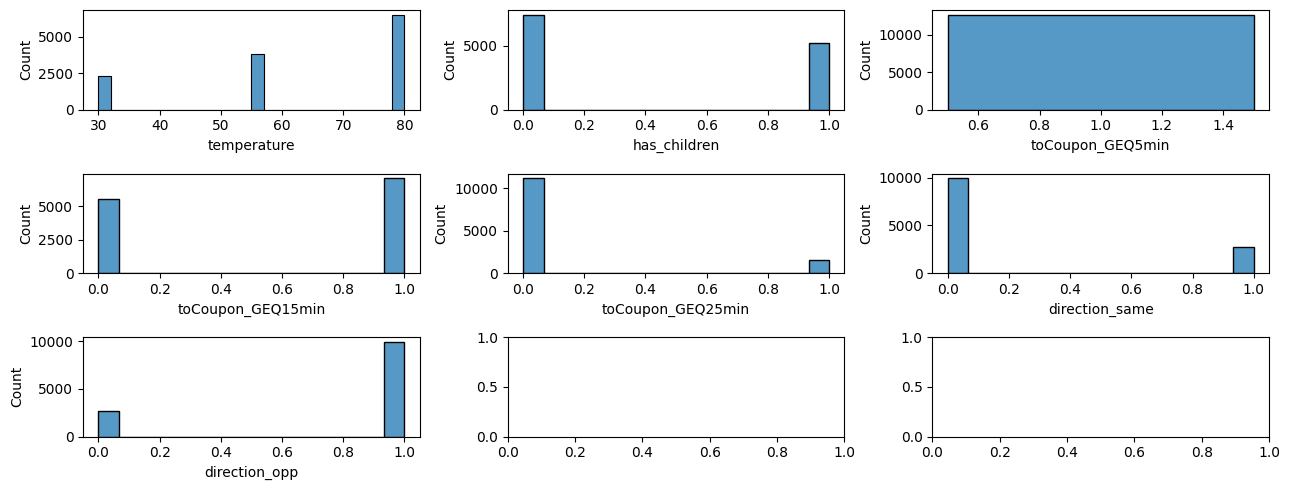

In [ ]:
width = 13
height = 5

plt.style.use("default")

figure, axes = plt.subplots(nrows=3, ncols=3, figsize=(width, height))

for column, axe in zip(dataset[numeric_columns], axes.flatten()):
    sns.histplot(dataset[column], ax=axe)
    
plt.tight_layout()

# Entrenamiento y verificación de un árbol de clasificación

# Visualización del árbol de clasificación